## Observations and Insights 

In [120]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)






In [121]:
#Display mouse data
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [122]:
#Display Study results
study_results.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [123]:
# Combine the data into a single dataset
# Use Mouse ID as the master
# Display the data table for preview
combined_mouse  = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")
combined_mouse.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [124]:
# Checking the number of mice.
total_mice = combined_mouse['Mouse ID'].nunique()
total_mice

249

In [125]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#Using the duplicated() method helps in analyzing duplicate values only

duplicate_mice = combined_mouse.duplicated (subset=['Mouse ID', 'Timepoint'], keep=False)
duplicate_mice

duplicate_mice_id = combined_mouse.loc[duplicate_mice, 'Mouse ID'].unique()
duplicate_mice_id


array(['g989'], dtype=object)

In [126]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = combined_mouse.loc[combined_mouse['Mouse ID'] == "g989",:]
duplicate_mice_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [127]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Using drop function do remove all the duplicate mice data
clean_mice_data = combined_mouse.drop(duplicate_mice_data.index)
clean_mice_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [128]:
# Checking the number of mice in the clean DataFrame.
count_clean_mice = len(clean_mice_data['Mouse ID'].unique())
count_clean_mice


248

## Summary Statistics

In [129]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


drug_regimen_mice = clean_mice_data.groupby('Drug Regimen')
drug_regimen_mice.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [130]:
#calculate the following properties of each drug regimen: mean, median, variance, standard deviation, and SEM of the tumor volume.

#Calculating mean tumor volume
mean_tumor = drug_regimen_mice['Tumor Volume (mm3)'].mean()

#Calculating median tumor volume
median_tumor = drug_regimen_mice['Tumor Volume (mm3)'].median()

#Calculating variance tumor volume
variance_tumor = drug_regimen_mice['Tumor Volume (mm3)'].var()

#Calculating Standard deviation of the tumor volume

std_dev_tumor = drug_regimen_mice['Tumor Volume (mm3)'].std()

#Calculating sem of the tumor volume
sem_tumor = drug_regimen_mice['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
summary_stats_tumor = pd.DataFrame ({"Mean Tumor": mean_tumor, "Median Tumor":median_tumor, "Variance Tumor": variance_tumor, "Standard Deviation Tumor": std_dev_tumor,"SEM Tumor":sem_tumor})


#Display the combined summary data
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats_tumor




,Mean Tumor,Median Tumor,Variance Tumor,Standard Deviation Tumor,SEM Tumor
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [131]:
# Using the aggregation method, produce the same summary statistics in a single line
# When using Aggregate function . it reads function, axis position, arguments and keyword arguments. It does recognise variable

summary_agg = drug_regimen_mice['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
summary_agg





,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [132]:
#Prepare the mice count based on Drug Regimen
count_mice_drug = drug_regimen_mice['Drug Regimen'].count()
count_mice_drug


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64

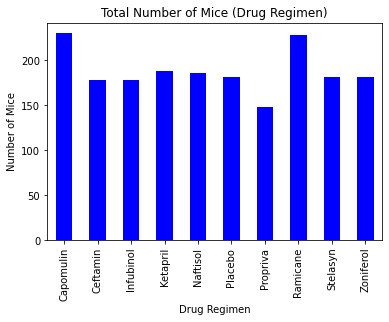

In [133]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_drug_mice = count_mice_drug.plot(kind='bar', color = 'b', width = 0.5, ylabel = 'Number of Mice', title = 'Total Number of Mice (Drug Regimen)')



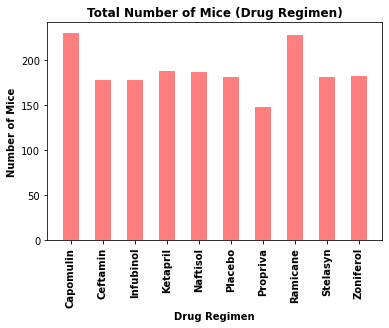

In [134]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = count_mice_drug.index.values
#x_axis
y_axis = count_mice_drug.values
#y_axis

#Create the chart using pyplot
ply_mice_bar = plt.bar(x_axis, y_axis, color = 'red', align = 'center', alpha = 0.5, width = 0.5)

#Set x, y label and title
plt.xticks (rotation = 'vertical', fontweight = 'bold')
plt.title ('Total Number of Mice (Drug Regimen)', fontweight = 'bold')
plt.xlabel ('Drug Regimen', fontweight = 'bold')
plt.ylabel ('Number of Mice', fontweight = 'bold')

#Display the bar chart
plt.show()



In [135]:
#Grouping the Gender
gender_mice = clean_mice_data.groupby('Sex')
gender_mice.head()
count_gender_mice = gender_mice['Sex'].count()
count_gender_mice


Sex
Female    922
Male      958
Name: Sex, dtype: int64

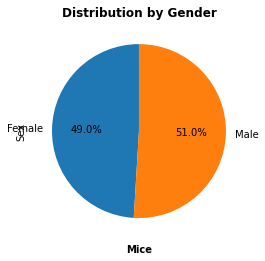

In [136]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pd_pie_mice = count_gender_mice.plot(kind='pie', autopct = '%1.1f%%', startangle = 90)

#Set title
pd_pie_mice.set_title(label = "Distribution by Gender", fontweight = 'bold')
pd_pie_mice.set_xlabel('Mice', fontweight = 'bold')


#Display the chart
plt.show()



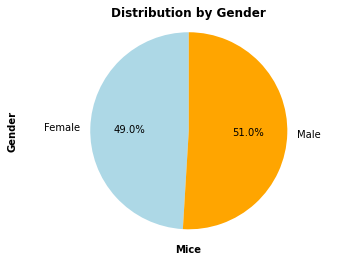

In [137]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Set Colors
colors = ['lightblue', 'orange']

#Using pyplot to create chart

plyplot_mice_gender = plt.pie(count_gender_mice, labels = count_gender_mice.index, autopct="%1.1f%%", colors = colors, startangle=90)

#set the axes equal to get a circle
plt.axis("equal")

#Set X,y Label and title and display the pie chart
plt.title("Distribution by Gender", fontweight = 'bold')
plt.xlabel("Mice", fontweight = 'bold')
plt.ylabel("Gender", fontweight = 'bold')

plt.show()







## Quartiles, Outliers and Boxplots

In [138]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_mouse= clean_mice_data.groupby("Mouse ID").max()['Timepoint']
max_timepoint_mouse



# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_volume = pd.merge(max_timepoint_mouse,clean_mice_data, on=["Mouse ID", "Timepoint"])
tumor_volume


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [139]:
# Put treatments into a list for for loop (and later for plot labels)
drug_treatments=["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_list=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_treatments:
    
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = tumor_volume.loc[tumor_volume['Drug Regimen']==drug, 'Tumor Volume (mm3)']
    
    # add subset
    tumor_list.append(final_tumor_vol)
    #tumor_list
    
    quartiles = final_tumor_vol.quantile([0.25,0.5,0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr=upper_q-lower_q
    lower_bound = lower_q - (1.5 * iqr)
    upper_bound = upper_q + (1.5 * iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound)| (final_tumor_vol > upper_bound)]
    outliers_count = outliers.count()
    print(f"Outliers for each {drug} is {outliers_count}" )
    

Outliers for each Capomulin is 0
Outliers for each Ramicane is 0
Outliers for each Infubinol is 1
Outliers for each Ceftamin is 0


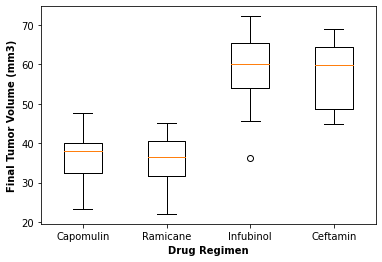

In [140]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_list, labels=drug_treatments)
plt.xlabel('Drug Regimen', fontweight ='bold')
plt.ylabel('Final Tumor Volume (mm3)', fontweight = 'bold')
plt.show()





## Line and Scatter Plots

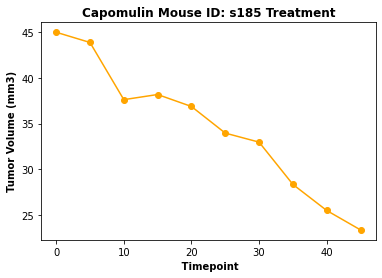

In [156]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_df = clean_mice_data.loc[clean_mice_data["Drug Regimen"] == "Capomulin"]
capomulin_df

#Take one specific mouse id which treated with Capomulin
capomulin_df_id= capomulin_df.loc[capomulin_df['Mouse ID']=='s185']
capomulin_df_id

#Generate the line plot
time_vol = plt.plot(capomulin_df_id['Timepoint'],capomulin_df_id['Tumor Volume (mm3)'], marker="o", color='orange' )


plt.title('Capomulin Mouse ID: s185 Treatment', fontweight = 'bold')

plt.xlabel(" Timepoint", fontweight = 'bold')
plt.ylabel("Tumor Volume (mm3)", fontweight = 'bold')
plt.show()







Text(0, 0.5, 'Average Tumor Volume (mm3)')

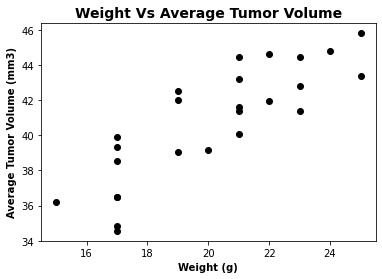

In [164]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

avg_capomulin_vol = capomulin_df.groupby(['Mouse ID']).mean()
avg_capomulin_vol

plt.scatter(avg_capomulin_vol['Weight (g)'], avg_capomulin_vol['Tumor Volume (mm3)'], color="black") 
plt.title("Weight Vs Average Tumor Volume", fontweight = 'bold', fontsize = 14)
plt.xlabel('Weight (g)', fontweight = 'bold')
plt.ylabel('Average Tumor Volume (mm3)', fontweight = 'bold')
                        



## Correlation and Regression

In [166]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

avg_x_axis = avg_capomulin_vol['Weight (g)']
avg_y_axis = avg_capomulin_vol['Tumor Volume (mm3)']

#Calculate the correlation
correlation = round(st.pearsonr(avg_x_axis,avg_y_axis)[0],2)

print (f"The Correlation Coefficient value is {correlation}")




The Correlation Coefficient value is 0.84


In [168]:
#Calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_x_axis,avg_y_axis)

#Calculate the r-squared
r_sqr = round(rvalue**2,2)
print(f"The R-Squared is:{r_sqr}")


The R-Squared is:0.71


In [169]:
#y = mx + b
linear_regress_values = avg_x_axis *slope + intercept
line_equation = "y = " + str(round(slope,2))+"x + "+ str(round(intercept,2))

print(f"The Line Equation is: {line_equation}")


The Line Equation is: y = 0.95x + 21.55


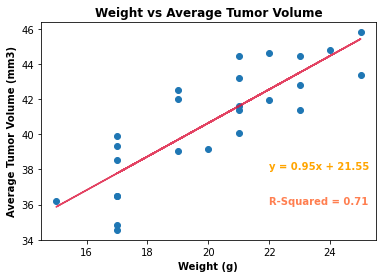

In [178]:
#plot the scatter chart and Annotation in the chart
plt.scatter(avg_x_axis,avg_y_axis)
plt.plot(avg_x_axis, linear_regress_values, color = 'crimson', alpha=0.8 )
plt.annotate(line_equation, (22,38), color ="orange", fontweight = 'bold')
plt.annotate(f'R-Squared = {r_sqr}', (22,36), color ="coral", fontweight = 'bold')

#Set Title and labels for x and y axis
plt.title ("Weight vs Average Tumor Volume", fontweight = 'bold', fontsize=12)
plt.xlabel('Weight (g)', fontweight = 'bold')
plt.ylabel('Average Tumor Volume (mm3)', fontweight = 'bold')

#Display the chart
plt.show()





